In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data loading and quick EDA

In [110]:
data = pd.read_csv('subscription.csv')

In [113]:
data.head()

,user_id,subscription_signup_date,subscription_monthly_cost,country,source,billing_cycles,is_active
0,1459,"January, 2015",29,Spain,ads,4,0
1,12474,"January, 2015",49,France,ads,5,0
2,12294,"January, 2015",49,Germany,ads,2,0
3,3878,"January, 2015",49,China,ads,1,0
4,9567,"January, 2015",49,UK,ads,5,0


**US, UK and Germany were the most developed market in terms of revenue while China contributed the least revenue**

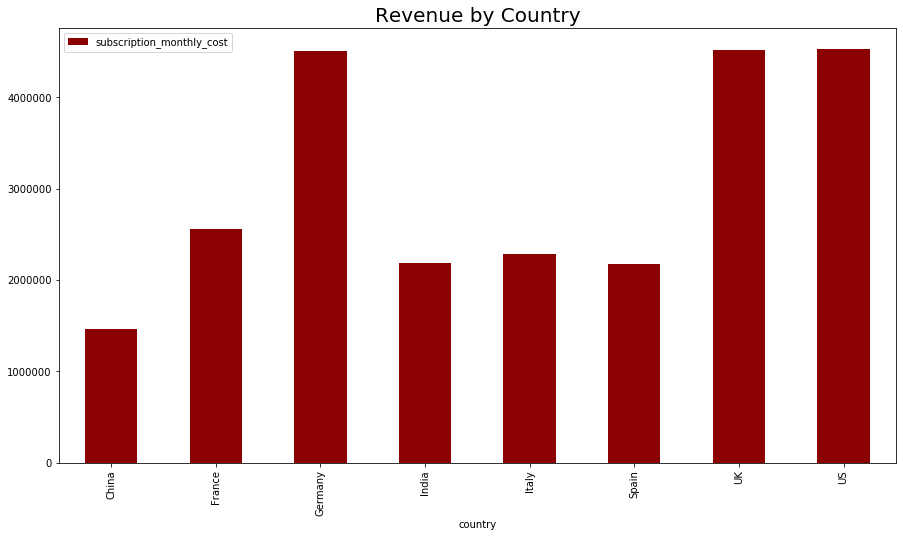

In [589]:
revenue_country = data.groupby(['country']).agg({"subscription_monthly_cost": sum})
revenue_country.plot(kind='bar', color='darkred', figsize=(15, 8))
plt.title('Revenue by Country', fontsize=20);

**Regardsless in which country, ads was the most popular way of obtaining a user.**

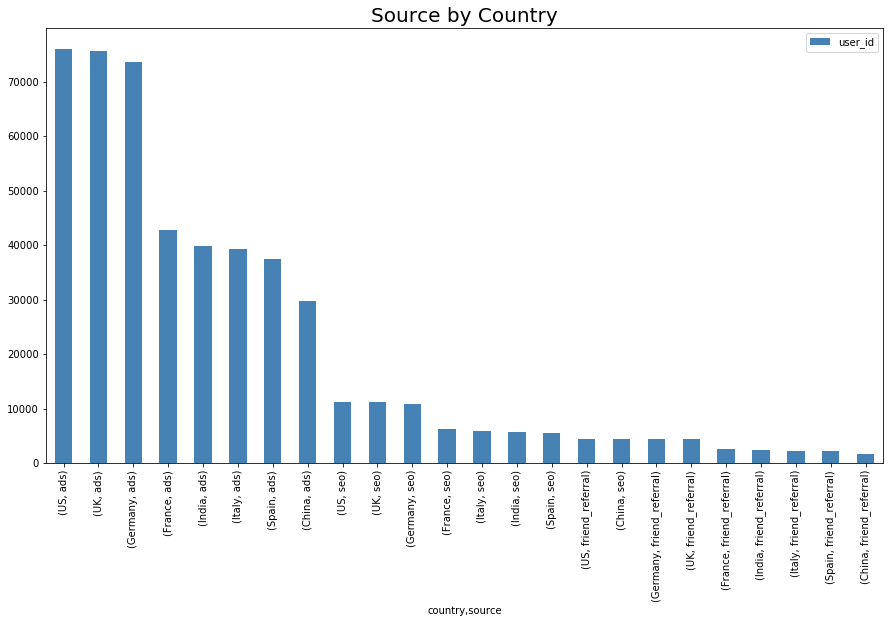

In [647]:
source_country = data.groupby(['country', 'source']).agg({'user_id': 'count'}).sort_values('user_id', ascending=False)
source_country.plot(kind='bar', color='steelblue', figsize=(15, 8))
plt.title('Source by Country', fontsize=20);

# Question one

In [293]:
df = data.pivot_table(index='subscription_monthly_cost', columns='billing_cycles', aggfunc={'is_active': lambda x: len(x)})
df = ((df.iloc[:, ::-1].cumsum(axis=1).iloc[:, ::-1]).T/df.sum(axis=1)).T
df.columns = [1,2,3,4,5,6,7,8]
df

,1,2,3,4,5,6,7,8
subscription_monthly_cost,,,,,,,,
29,1.0,0.607542,0.458473,0.376232,0.323028,0.285416,0.257157,0.235901
49,1.0,0.383666,0.206247,0.134043,0.096466,0.074072,0.059408,0.048845
99,1.0,0.158769,0.070040,0.042411,0.029676,0.022182,0.017937,0.015007


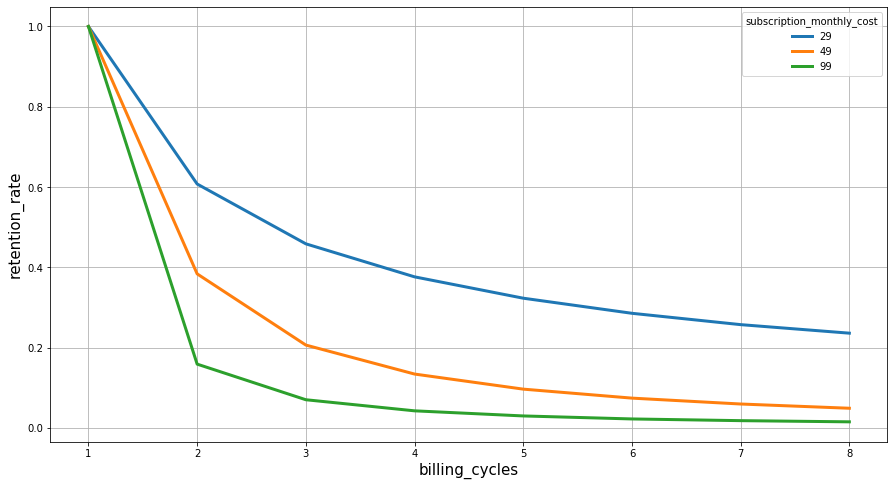

In [558]:
fig, ax = plt.subplots(figsize=(15, 8))
df.T.plot(kind='line', ax=ax, linewidth=3)
ax.set_xlabel('billing_cycles', fontsize=15);
ax.set_ylabel('retention_rate', fontsize=15);
ax.grid(True)

# Question two

## Approach one

**Intuitively, the curve of the retention rate over time seems to fit power functions with negative exponent. Therefore, fitting those data into a mathematical function might be a good attempt**

In [312]:
x = np.array(df.T.index)
y_29 = df.T[29].values
y_49 = df.T[49].values
y_99 = df.T[99].values

In [453]:
# Fitting the data in the form of y = x**(-b)+c
from scipy.optimize import curve_fit
 
def func(x, b, a, c):
    
    return a*x**(-b) + c
 
popt, pcov = curve_fit(func, x, y_29)
y_29_fit = [func(i, popt[0], popt[1], popt[2]) for i in x]

popt, pcov = curve_fit(func, x, y_49)
y_49_fit = [func(i, popt[0], popt[1], popt[2]) for i in x]

popt, pcov = curve_fit(func, x, y_99)
y_99_fit = [func(i, popt[0], popt[1], popt[2]) for i in x]

In [454]:
fitting_cuve = pd.DataFrame(data={'active_months': x,
                                  'plan_29_true':  y_29,'plan_29_fitted': y_29_fit, 
                                  'plan_49_true':  y_49,'plan_49_fitted': y_49_fit,
                                  'plan_99_true':  y_99,'plan_99_fitted': y_99_fit})

In [455]:
fitting_cuve

,active_months,plan_29_true,plan_29_fitted,plan_49_true,plan_49_fitted,plan_99_true,plan_99_fitted
0,1,1.000000,0.999749,1.000000,1.000822,1.000000,0.999773
1,2,0.607542,0.608755,0.383666,0.377686,0.158769,0.162760
2,3,0.458473,0.457934,0.206247,0.210906,0.070040,0.064259
3,4,0.376232,0.375425,0.134043,0.137985,0.042411,0.037944
4,5,0.323028,0.322552,0.096466,0.098311,0.029676,0.027924
5,6,0.285416,0.285421,0.074072,0.073830,0.022182,0.023256
6,7,0.257157,0.257729,0.059408,0.057427,0.017937,0.020776
7,8,0.235901,0.236182,0.048845,0.045780,0.015007,0.019332


**As shown in the grap and the table above, the power function works well for modeling the data**

In [565]:
fitting_cuve

,active_months,plan_29_true,plan_29_fitted,plan_49_true,plan_49_fitted,plan_99_true,plan_99_fitted
0,1,1.000000,0.999749,1.000000,1.000822,1.000000,0.999773
1,2,0.607542,0.608755,0.383666,0.377686,0.158769,0.162760
2,3,0.458473,0.457934,0.206247,0.210906,0.070040,0.064259
3,4,0.376232,0.375425,0.134043,0.137985,0.042411,0.037944
4,5,0.323028,0.322552,0.096466,0.098311,0.029676,0.027924
5,6,0.285416,0.285421,0.074072,0.073830,0.022182,0.023256
6,7,0.257157,0.257729,0.059408,0.057427,0.017937,0.020776
7,8,0.235901,0.236182,0.048845,0.045780,0.015007,0.019332


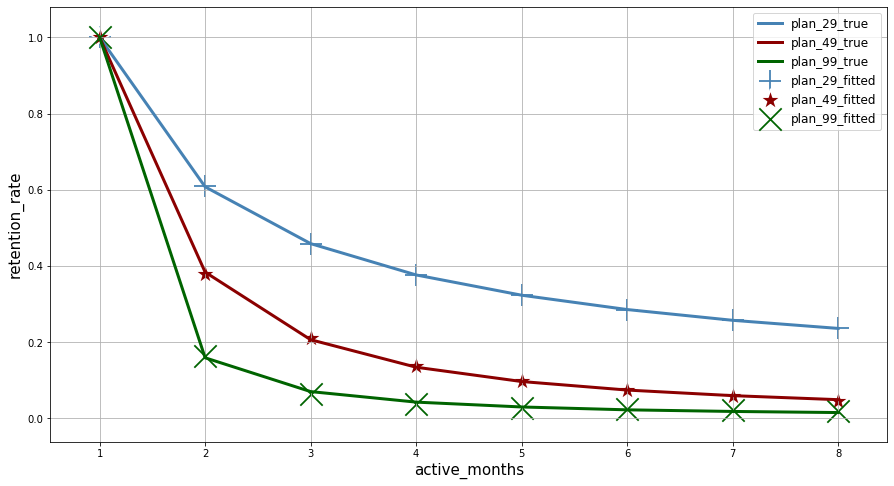

In [570]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=fitting_cuve, x='active_months', y='plan_29_true', ax=ax, color='steelblue', linewidth = 3, label='plan_29_true')
sns.scatterplot(data=fitting_cuve,x='active_months', y='plan_29_fitted', ax=ax, color='steelblue', marker="+", s=500, label='plan_29_fitted')
sns.lineplot(data=fitting_cuve, x='active_months', y='plan_49_true', ax=ax, color='darkred', linewidth = 3, label='plan_49_true')
sns.scatterplot(data=fitting_cuve, x='active_months', y='plan_49_fitted', ax=ax, color='darkred', marker="*", s=500, label='plan_49_fitted')
sns.lineplot(data=fitting_cuve, x='active_months', y='plan_99_true', ax=ax, color='darkgreen', linewidth = 3, label='plan_99_true')
sns.scatterplot(data=fitting_cuve,x='active_months', y='plan_99_fitted', ax=ax, color='darkgreen', marker="x", s=500, label='plan_99_fitted')
ax.set_xlabel('active_months', fontsize=15)
ax.set_ylabel('retention_rate', fontsize=15)
ax.legend(fontsize=12)
ax.grid(True)

In [475]:
from sklearn.metrics import mean_squared_error

e1 = mean_squared_error(fitting_cuve['plan_29_true'], fitting_cuve['plan_29_fitted'], squared=False)
e2 = mean_squared_error(fitting_cuve['plan_49_true'], fitting_cuve['plan_49_fitted'], squared=False)
e3 = mean_squared_error(fitting_cuve['plan_99_true'], fitting_cuve['plan_99_fitted'], squared=False)

print("root rquared error for 29 dollars plan: ", e1)
print("-------------------------------------------------------------")
print("root rquared error for 49 dollars plan: ", e2)
print("-------------------------------------------------------------")
print("root rquared error for 99 dollars plan: ", e3)
print("-------------------------------------------------------------")
print("root rquared error for all plans: ", e1+e2+e3)

root rquared error for 29 dollars plan:  0.0006234511277579792
-------------------------------------------------------------
root rquared error for 49 dollars plan:  0.003362763089342312
-------------------------------------------------------------
root rquared error for 99 dollars plan:  0.003541456635844221
-------------------------------------------------------------
root rquared error for all plans:  0.007527670852944512


**Clearly, the model works very well.**

## Approach two

**Another less straightforward method but holds the similar fundamental princeple that could possibly work well is the generalized linear regression. From the previous plotted graph, it is clear to see the linear function won't be strictly linear, therefore, some non-linear proxies such as a square or logarithmic term might helpful.**

In [466]:
from sklearn.linear_model import LinearRegression

# create non-linear features
x2 = x ** 2
logx = np.log(x)

lr = pd.DataFrame({'x': x, 'x2': x2, 'logx': logx, 'y_29': y_29, 'y_49': y_49, 'y_99': y_99}, 
                        columns=['x', 'x2', 'logx', 'y_29', 'y_49', 'y_99'])
lr

,x,x2,logx,y_29,y_49,y_99
0,1,1,0.000000,1.000000,1.000000,1.000000
1,2,4,0.693147,0.607542,0.383666,0.158769
2,3,9,1.098612,0.458473,0.206247,0.070040
3,4,16,1.386294,0.376232,0.134043,0.042411
4,5,25,1.609438,0.323028,0.096466,0.029676
5,6,36,1.791759,0.285416,0.074072,0.022182
6,7,49,1.945910,0.257157,0.059408,0.017937
7,8,64,2.079442,0.235901,0.048845,0.015007


In [481]:
lr_29 = LinearRegression().fit(lr[['x', 'x2', 'logx']], np.log(lr['y_29']))
lr_49 = LinearRegression().fit(lr[['x', 'x2', 'logx']], np.log(lr['y_49']))
lr_99 = LinearRegression().fit(lr[['x', 'x2', 'logx']], np.log(lr['y_99']))

In [482]:
lr_fit = pd.DataFrame({'x': x, 'x2': x2, 'logx': logx}, columns=['x', 'x2', 'logx'])
lr_fit['lr_plan_29_fitted'] = np.exp(lr_29.predict(pred[['x', 'x2', 'logx']]))
lr_fit['lr_plan_49_fitted'] = np.exp(lr_49.predict(pred[['x', 'x2', 'logx']]))
lr_fit['lr_plan_99_fitted'] = np.exp(lr_99.predict(pred[['x', 'x2', 'logx']]))

In [483]:
lr_fit

,x,x2,logx,lr_plan_29_fitted,lr_plan_49_fitted,lr_plan_99_fitted
0,1,1,0.000000,0.999502,1.003844,0.992027
1,2,4,0.693147,0.608619,0.378064,0.163419
2,3,9,1.098612,0.458101,0.208259,0.069098
3,4,16,1.386294,0.375765,0.135129,0.041513
4,5,25,1.609438,0.322898,0.096500,0.029441
5,6,36,1.791759,0.285608,0.073590,0.022695
6,7,49,1.945910,0.257606,0.058968,0.018197
7,8,64,2.079442,0.235610,0.049174,0.014781


In [484]:
lr_e1 = mean_squared_error(y_29,pred['pred_29'],squared=False)
lr_e2 = mean_squared_error(y_49,pred['pred_49'],squared=False)
lr_e3 = mean_squared_error(y_99,pred['pred_99'],squared=False)

print("linear regression root rquared error for 29 dollars plan: ", lr_e1)
print("-------------------------------------------------------------")
print("linear regression root rquared error for 49 dollars plan: ", lr_e2)
print("-------------------------------------------------------------")
print("linear regression root rquared error for 99 dollars plan: ", lr_e3)
print("-------------------------------------------------------------")
print("linear regression root rquared error for all plans: ", lr_e1+lr_e2+lr_e3)

linear regression root rquared error for 29 dollars plan:  0.0005130871699663988
-------------------------------------------------------------
linear regression root rquared error for 49 dollars plan:  0.002547421601132137
-------------------------------------------------------------
linear regression root rquared error for 99 dollars plan:  0.0033039396128923286
-------------------------------------------------------------
linear regression root rquared error for all plans:  0.006364448383990864


**Although the linear regression model has shown a smaller RMSE, both models work quite well, consider the level of error and the tendency for overfitting.**

In [545]:
x_test = np.array([[9], [10], [11], [12]])
x_test_square = x_test**2
logx_test = np.log(x_test)

lr_plan_29_prediction = np.exp(lr_29.predict(np.hstack((x_test, x_test_square, logx_test))))
lr_plan_49_prediction = np.exp(lr_49.predict(np.hstack((x_test, x_test_square, logx_test))))
lr_plan_99_prediction = np.exp(lr_99.predict(np.hstack((x_test, x_test_square, logx_test))))

**For each price point, the percentage of users is still subscribed after at least 12 months:**

In [549]:
lr_prediction = pd.DataFrame(data={'billing_cycles': x_test.ravel(), 'retention_29': lr_plan_29_prediction,
                                  'retention_49': lr_plan_49_prediction, 'retention_99': lr_plan_99_prediction})
lr_prediction

,billing_cycles,retention_29,retention_49,retention_99
0,9,0.217726,0.042412,0.011960
1,10,0.202786,0.037674,0.009529
2,11,0.190026,0.034361,0.007414
3,12,0.178925,0.032107,0.005599


# Question 3

In [554]:
df_country = data.pivot_table(index='country', columns='billing_cycles', aggfunc={'is_active': lambda x: len(x)})
df_country = ((df_country.iloc[:, ::-1].cumsum(axis=1).iloc[:, ::-1]).T/df_country.sum(axis=1)).T
df_country.columns = [1,2,3,4,5,6,7,8]
df_country

,1,2,3,4,5,6,7,8
country,,,,,,,,
China,1.0,0.514831,0.402777,0.360426,0.336274,0.319856,0.307084,0.295453
France,1.0,0.334946,0.177732,0.119004,0.088479,0.069935,0.058341,0.049688
Germany,1.0,0.451284,0.278411,0.195910,0.146474,0.115151,0.093868,0.078465
India,1.0,0.446728,0.326962,0.284527,0.261603,0.246736,0.234847,0.225769
Italy,1.0,0.341684,0.179502,0.119914,0.090015,0.071135,0.057523,0.048695
Spain,1.0,0.339098,0.178985,0.119879,0.088648,0.070065,0.057617,0.048503
UK,1.0,0.458938,0.285133,0.198067,0.149421,0.117356,0.095735,0.079494
US,1.0,0.456509,0.284255,0.198853,0.149284,0.117398,0.094875,0.078981


**Among all countries, China and India have the higher retention rate, which stayed above 40% over the 8 months period**

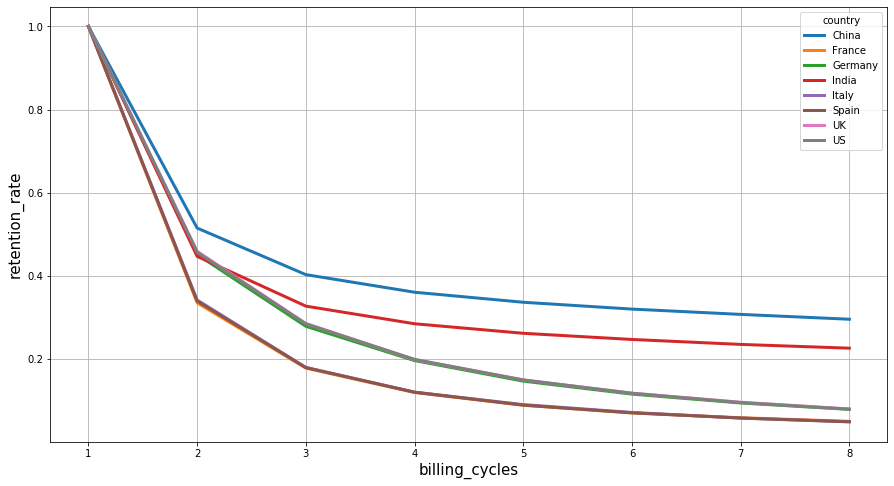

In [560]:
fig, ax = plt.subplots(figsize=(15, 8))
df_country.T.plot(kind='line', ax=ax, linewidth=3)
ax.set_xlabel('billing_cycles', fontsize=15);
ax.set_ylabel('retention_rate', fontsize=15);
ax.grid(True)

In [556]:
df_source = data.pivot_table(index='source', columns='billing_cycles', aggfunc={'is_active': lambda x: len(x)})
df_source = ((df_source.iloc[:, ::-1].cumsum(axis=1).iloc[:, ::-1]).T/df_source.sum(axis=1)).T
df_source.columns = [1,2,3,4,5,6,7,8]
df_source

,1,2,3,4,5,6,7,8
source,,,,,,,,
ads,1.0,0.388873,0.222094,0.152607,0.114959,0.092043,0.076756,0.066237
friend_referral,1.0,0.699443,0.617038,0.561282,0.519854,0.487596,0.461110,0.436507
seo,1.0,0.562395,0.420012,0.337594,0.286254,0.247877,0.218680,0.194475


**Friend referral turned out to be the most effective marketing source.**

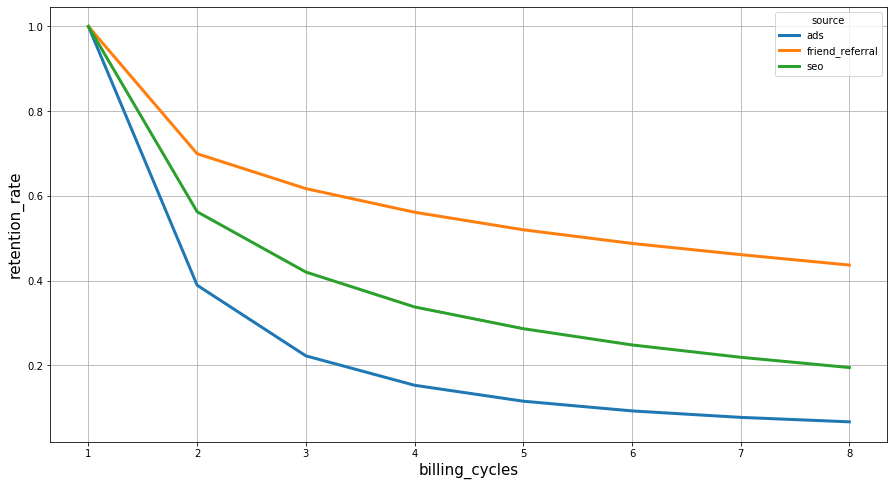

In [561]:
fig, ax = plt.subplots(figsize=(15, 8))
df_source.T.plot(kind='line', ax=ax, linewidth=3)
ax.set_xlabel('billing_cycles', fontsize=15);
ax.set_ylabel('retention_rate', fontsize=15);
ax.grid(True)

# Question 4

**Suggestions:**
- **Cut down budget for ads and incentivize existing users to refer the product to their frieds. Based on the 8-month customer value shown in the below table, the top 10 lucrative segmentation were all from the source of friend referral. This point could also be verified by the fact 99 dollars product from friend referal had the highest retention rate as shown in the figure below.**
- **Consider discount for Chinese users of the 99 monthly cost product. Although China held the highest retention rate, the retention rate for the premium product was not as good as the low end product, was it because of the price or other marketing issues, it should be investigated.**

In [666]:
df_comp = data.pivot_table(index=['country','source','subscription_monthly_cost'], columns='billing_cycles', aggfunc={'is_active': lambda x: len(x)})
df_comp = ((df_comp.iloc[:, ::-1].cumsum(axis=1).iloc[:, ::-1]).T/df_comp.sum(axis=1)).T
df_comp.columns = [1,2,3,4,5,6,7,8]
df_comp = df_comp.fillna(0)
df_comp = df_comp.reset_index()
df_comp['user_value'] = df_comp['subscription_monthly_cost'] * df_comp[[1,2,3,4,5,6,7,8]].sum(axis=1)
df_comp_agg = df_comp.groupby(['country', 'source', 'subscription_monthly_cost'], as_index=False).agg({'user_value': sum}).sort_values('user_value', ascending=False)
df_comp_agg.head(10)

,country,source,subscription_monthly_cost,user_value
23,Germany,friend_referral,99,310.051447
68,US,friend_referral,99,302.614367
59,UK,friend_referral,99,287.984823
67,US,friend_referral,49,253.068702
58,UK,friend_referral,49,248.829584
22,Germany,friend_referral,49,248.484444
50,Spain,friend_referral,99,239.949153
14,France,friend_referral,99,227.169643
41,Italy,friend_referral,99,226.416667
40,Italy,friend_referral,49,206.009253


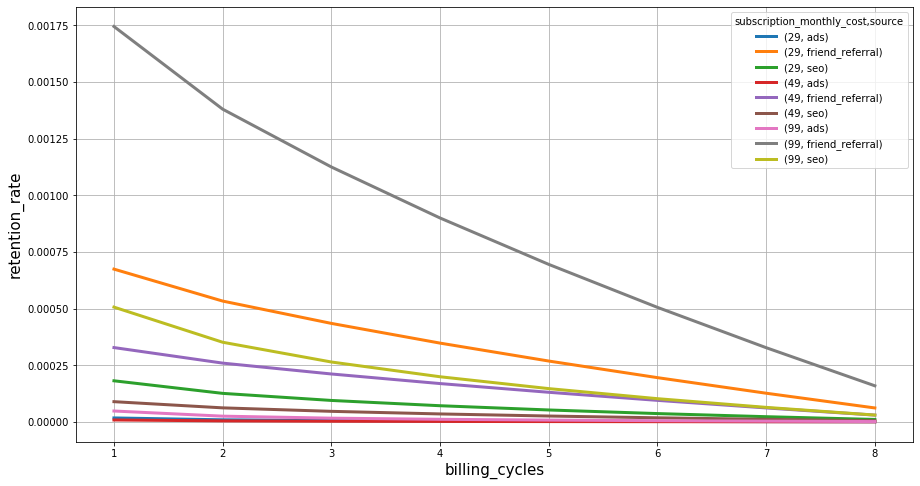

In [595]:
df_source_plan = data.pivot_table(index=['subscription_monthly_cost','source'], columns='billing_cycles', aggfunc={'is_active': lambda x: len(x)})
df_source_plan = ((df_source.iloc[:, ::-1].cumsum(axis=1).iloc[:, ::-1]).T/df_source_plan.sum(axis=1)).T
df_source_plan.columns = [1,2,3,4,5,6,7,8]

fig, ax = plt.subplots(figsize=(15, 8))
df_source_plan.T.plot(kind='line', ax=ax, linewidth=3)
ax.set_xlabel('billing_cycles', fontsize=15);
ax.set_ylabel('retention_rate', fontsize=15);
ax.grid(True)